<a href="https://colab.research.google.com/github/Sylver640/ADA-Informes/blob/main/Informe_KruskalAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema (árbol recubridor mínimo)
**Entrada**: Grafo conectado no dirigido $G=(V,E)$ y un costo real $c_e$ para cada arco $e\in E$.

**Salida**: Un árbol recubridor $T\in E$ de $G$ con el mínimo coste $\sum\limits_{e\in T}c_e$.

Entre muchos de los problemas que trata de resolver la rama matemática que es la teoría de grafos, encontramos al **árbol recubridor mínimo o MST** (Minimum Spanning Tree, por sus siglas en inglés). Éste consiste en encontrar un subgrafo que debe ser un árbol, que por definición no contiene ciclos, el cual trata de conectar un conjunto de objetos de la forma más económica posible. Trabaja solo en grafos conectados **no dirigidos** y donde cada arco $e$ tiene un costo o peso $c_e$. Además, siempre debe cumplir propiedades, siendo algunas de ellas las siguientes:

1. El árbol $T$ no debe contener ciclos.
2. Un árbol recubridor de $n$ vértices tiene $n-1$ arcos.
3. Para cada par de vértices $v,w\in V$, $T$ debe incluir un camino $v \leadsto w$ (recubridor)

![image](https://upload.wikimedia.org/wikipedia/commons/d/d2/Minimum_spanning_tree.svg)

Este problema tiene una relación directa en problemas del diseño de redes, incluyendo redes computacionales, de transporte, de telecomunicaciones, entre otras, además del aprendizaje automático. Ahora bien, muchos algoritmos han encontrado una forma de resolver este problema. El primero de ellos fue desarrollado por el científico checo Otakar Borůvka en 1926. Plantando esta semilla, en las décadas siguientes fueron inventados dos algoritmos que tratan de encontrar la mejor solución, **Prim y Kruskal**, siendo el último nuestro enfoque de análisis.

#2. Algoritmo de Kruskal
Este algoritmo fue inventado en 1956 por el matemático y científico estadounidense **Joseph Kruskal**. A continuación, el siguiente código presenta una implementación del algoritmo.

##2.1 Código

arbol ordenado
[(0, 1, {'weight': 13}), (0, 2, {'weight': 39}), (0, 4, {'weight': 96}), (0, 6, {'weight': 97}), (1, 2, {'weight': 54}), (1, 3, {'weight': 80}), (1, 4, {'weight': 48}), (2, 5, {'weight': 11}), (3, 5, {'weight': 17}), (3, 6, {'weight': 50}), (4, 6, {'weight': 33})]


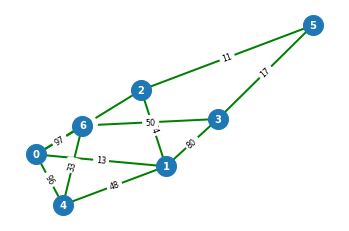

In [126]:
import networkx as nx #Librería complementaria para trabajar con grafos
import algorithmx
import random
import matplotlib.pyplot as plt

def kruskalMST(G):
  print("arbol ordenado")
  return 1

#Ejemplo
n = random.randint(5,10)
G = nx.gnp_random_graph(n, 0.5,138)
nx.set_edge_attributes(G, {e: {'weight': random.randint(1, 100)} for e in G.edges})

#print(G[1][2]['weight'])

kruskalMST(G)
print(G.edges(data=True))

#Esto es para mostrar el grafo
pos=nx.spring_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=8)
nx.draw(G, pos, with_labels=True, node_size=400, font_color="white", font_size=10, font_weight="black", width=2.0, edge_color ="green")


#2.2 Descripción del algoritmo
Siguiendo con la línea de estudio, el algoritmo estudiado es constructivo, y fue implementado siguiendo la metodología **greedy o voraz**, es decir, construye una solución paso a paso en base a una regla heurística. Recibe un grafo $G$ de $n$ nodos, y retorna una lista que contiene las conexiones del árbol recubridor encontrado, junto con el peso de cada una. De forma general, funciona de la siguiente manera:
1. En una lista se guarda cada conexión del grafo, las que luego se ordenan de menor a mayor utilizando un algoritmo de ordenamiento eficaz, como en este caso, **Merge Sort**.
2. Luego, en un ciclo `for` recorremos cada arco, comenzando con el menor. En cada iteración se verifica si es que éste genera un ciclo con ayuda de la estructura complementaria **Union-Find**. Dependiendo el resultado sucederá uno de los siguientes casos: si $T\cup{e}$ es acíclico, agregamos esta conexión a nuestro árbol, si no seguimos con el siguiente arco.
3. Finalmente retornamos este árbol, el cual incluye todas las conexiones y los pesos de cada una de ellas.

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/MST_kruskal_en.gif/600px-MST_kruskal_en.gif)

#2.3 Ejemplo